<a href="https://colab.research.google.com/github/sergiosb99/SSJ_SupervisedLearning/blob/Novelty/Dengue_Upgrade_Cities_Weeks_Years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **0. Introduction**


We will use the data from the competition to predict the evolution of Dengue Disease in both Iquitos and San Juan. More information in [link](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

The objective of the exercise is to solve a regression problem and on the other hand to participate in a data competition.


# **1. Libraries**

Before starting any analysis we must ensure that the basic and general use libraries (numpy, pandas, etc.) are correctly imported. 

In [1]:
# Loading the data
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import io
from google.colab import files

# Graphics display
import seaborn as sns
import matplotlib.pyplot as plt

# Estimator and model selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Others
import numpy as np    
from sklearn.metrics import mean_absolute_error



#  **2. Loading the data**

The first step is to upload all the CSV files that have been provided to us and that thanks to them we will obtain the data with which we are going to work. To do this, we will use the tools that Google Colab offers us when uploading files.

# Preprocessing the data

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, etc.

We first load the datasets, and merge them in one, named train.

In [2]:
train_feat = pd.read_csv('dengue_features_train.csv')

In [3]:
train_labels = pd.read_csv('dengue_labels_train.csv')

In [4]:
train = pd.merge(train_feat,train_labels,on=['city','year','weekofyear'])

We upload the test dataset in order to know how good our model is.

In [5]:
test = pd.read_csv('dengue_features_test.csv')

We fill the Nan values:

In [6]:
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

In [7]:
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


We are going to select this features for our training:

In [8]:
selected_features = ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 
                 'station_avg_temp_c', 'station_min_temp_c']

As we have seen in other notebooks, the information is different depending on the city, so we are going to divide the dataset in two.


First we obtain all the cases from San Juan:

In [9]:
df_sj = train[train['city']=='sj']
df_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,292.095714,299.7,294.4,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8,4
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,3
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,292.732857,299.4,295.8,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7,1
934,sj,2008,16,2008-04-15,0.001800,-0.052750,0.203900,0.209843,0.00,297.630000,297.778571,292.274286,299.7,295.9,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2,3



Now from Iquitos:

In [10]:
df_iq = train[train['city']=='iq']
df_iq

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


We remove first the years that in previous notebook were deleted.

In [11]:
#San Juan
df_sj.drop(df_sj[df_sj['year']==2000].index,inplace=True)
df_sj.drop(df_sj[df_sj['year']==2002].index,inplace=True)
df_sj.drop(df_sj[df_sj['year']==2004].index,inplace=True)
df_sj.drop(df_sj[df_sj['year']==2006].index,inplace=True)
df_sj.drop(df_sj[df_sj['year']==2008].index,inplace=True)

#Iquitos
df_iq.drop(df_iq[df_iq['year']==2000].index,inplace=True)
df_iq.drop(df_iq[df_iq['year']==2001].index,inplace=True)
df_iq.drop(df_iq[df_iq['year']==2003].index,inplace=True)

We want to know general information about the cases depending on the week of the year of each city.

From San Juan:

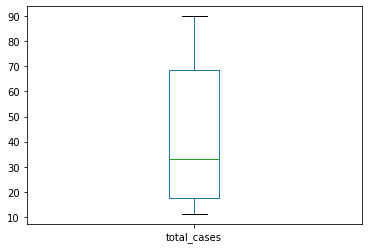

In [12]:
df_sj.groupby("weekofyear")['total_cases'].mean().plot.box()

In [13]:
df_sj.groupby("weekofyear")['total_cases'].mean()

weekofyear
1     37.846154
2     36.769231
3     36.076923
4     32.384615
5     31.153846
6     26.076923
7     24.153846
8     24.384615
9     22.923077
10    22.307692
11    16.384615
12    14.923077
13    16.384615
14    12.230769
15    12.538462
16    12.692308
17    11.307692
18    12.214286
19    11.928571
20    13.928571
21    13.142857
22    15.642857
23    16.428571
24    17.857143
25    19.928571
26    25.571429
27    25.357143
28    28.500000
29    31.571429
30    41.142857
31    46.714286
32    59.500000
33    59.214286
34    60.500000
35    68.500000
36    71.357143
37    73.071429
38    71.000000
39    77.928571
40    89.785714
41    89.285714
42    83.071429
43    78.785714
44    81.785714
45    81.142857
46    70.142857
47    70.642857
48    70.428571
49    56.714286
50    48.142857
51    39.357143
52    47.545455
53    33.000000
Name: total_cases, dtype: float64

From Iquitos:

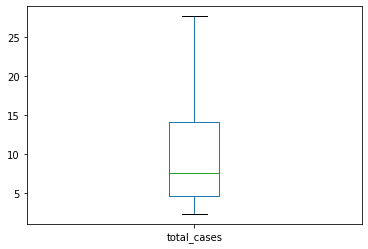

In [14]:
df_iq.groupby("weekofyear")['total_cases'].mean().plot.box()

In [15]:
df_iq.groupby("weekofyear")['total_cases'].mean()

weekofyear
1     10.375000
2     16.625000
3     12.750000
4     19.500000
5     18.375000
6     17.375000
7     14.875000
8     14.250000
9     13.250000
10    10.250000
11     8.250000
12     7.625000
13     7.500000
14     8.500000
15     6.625000
16     7.000000
17     5.875000
18     5.875000
19     7.000000
20     5.750000
21     4.250000
22     5.750000
23     3.500000
24     3.375000
25     4.625000
26     2.285714
27     4.285714
28     3.571429
29     3.857143
30     4.142857
31     4.571429
32     4.142857
33     4.428571
34     4.714286
35     3.714286
36     6.857143
37     6.142857
38     8.428571
39     9.285714
40    14.142857
41    11.571429
42    17.714286
43    14.857143
44    15.428571
45    15.000000
46    16.000000
47    14.000000
48     9.714286
49    24.285714
50    27.714286
51    13.000000
52     5.500000
53     4.500000
Name: total_cases, dtype: float64

Pues hay que probar a hacerlo con iquitos también.

We select the first set of weeks from San Juan:

In [16]:
df_sj_week1 = df_sj[df_sj['weekofyear']<=5]
df_sj_week1 = df_sj_week1.append(df_sj[df_sj['weekofyear']>=28])
df_sj_week1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
35,sj,1991,1,1991-01-01,0.14650,0.140467,0.151500,0.167314,0.00,297.060000,297.135714,291.907143,299.0,293.9,4.80,72.938571,0.00,13.511429,2.528571,24.385714,7.457143,29.4,18.9,5.3,21
36,sj,1991,2,1991-01-08,0.14650,0.100467,0.251900,0.137617,15.85,297.674286,297.828571,293.282857,299.3,295.8,26.33,76.628571,15.85,14.671429,1.885714,24.914286,6.314286,28.3,21.1,31.7,21
37,sj,1991,3,1991-01-15,0.14650,0.293567,0.259943,0.217900,0.00,297.422857,297.657143,293.412857,299.3,296.1,27.40,78.500000,0.00,14.798571,2.000000,25.242857,6.571429,29.4,21.1,16.5,26
38,sj,1991,4,1991-01-22,0.33130,0.309333,0.221029,0.202757,0.00,297.884286,298.150000,292.382857,300.3,296.0,0.70,71.597143,0.00,13.878571,2.557143,24.714286,7.771429,29.4,18.3,6.8,34
39,sj,1991,5,1991-01-29,0.09170,0.246425,0.243857,0.195600,0.00,298.044286,298.228571,292.572857,300.1,295.0,5.70,71.784286,0.00,14.044286,2.771429,24.828571,8.157143,30.0,18.9,5.9,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,sj,2007,48,2007-11-26,-0.05950,-0.041667,0.090917,0.129086,15.95,299.090000,299.192857,293.351429,300.7,297.3,9.78,70.727143,15.95,14.768571,2.071429,25.442857,5.385714,28.9,22.2,36.4,29
915,sj,2007,49,2007-12-03,-0.05950,-0.042350,0.095600,0.089000,17.85,299.020000,299.021429,294.288571,300.8,297.1,68.00,75.368571,17.85,15.675714,2.100000,25.842857,5.400000,29.4,22.8,34.5,17
916,sj,2007,50,2007-12-10,-0.13305,-0.045550,0.151440,0.143171,31.30,298.900000,298.971429,294.774286,300.9,297.0,66.72,78.015714,31.30,16.130000,2.485714,25.771429,5.085714,28.9,22.2,30.2,12
917,sj,2007,51,2007-12-17,-0.13305,-0.039000,0.173417,0.150171,62.11,298.668571,298.757143,294.977143,300.4,296.2,50.53,80.178571,62.11,16.344286,2.371429,25.071429,4.914286,28.9,21.7,108.2,13


The rest:

In [17]:
df_sj_week2 = df_sj.drop(df_sj_week1.index)
df_sj_week2

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,sj,2007,23,2007-06-04,-0.011800,-0.061600,0.146843,0.165729,85.81,300.961429,301.171429,296.107143,303.3,298.9,17.74,74.962857,85.81,17.507143,3.428571,29.200000,7.400000,33.9,23.3,33.3,18
890,sj,2007,24,2007-06-11,-0.005400,-0.024933,0.103557,0.085914,62.42,300.550000,300.564286,295.975714,302.9,298.4,25.30,76.162857,62.42,17.370000,2.385714,28.542857,7.214286,34.4,23.9,47.6,21
891,sj,2007,25,2007-06-18,0.105800,0.043280,0.197614,0.208700,15.76,301.145714,301.371429,296.085714,303.6,298.9,4.20,74.160000,15.76,17.488571,2.971429,29.014286,7.500000,33.9,24.4,4.3,34
892,sj,2007,26,2007-06-25,0.248400,0.118650,0.227343,0.163200,46.08,301.097143,301.307143,296.540000,303.7,299.3,9.70,76.328571,46.08,17.947143,2.671429,29.271429,6.542857,33.9,25.0,1.5,25


We can see a difference in the total_cases for the two datasets:

In [18]:
df_sj_week1['total_cases'].mean()

59.18795180722891

In [19]:
df_sj_week2['total_cases'].mean()

17.635135135135137

#**3. Detaching the dataset**

To train the models that we make, it is necessary to separate our training dataset into two parts, one precisely to train the model, and another to check if our models are good.

In this case, we are going to use three differents models, two for San Juan (for each split of weeks) and one for Iquitos.

In [20]:
X_train_sj_w1, X_test_sj_w1, y_train_sj_w1, y_test_sj_w1 = train_test_split(df_sj_week1[selected_features], df_sj_week1['total_cases'], test_size=0.2, random_state=1)

In [21]:
X_train_sj_w2, X_test_sj_w2, y_train_sj_w2, y_test_sj_w2 = train_test_split(df_sj_week2[selected_features], df_sj_week2['total_cases'], test_size=0.2, random_state=1)

In [27]:
X_train_iq, X_test_iq, y_train_iq, y_test_iq = train_test_split(df_iq[selected_features], df_iq['total_cases'], test_size=0.2, random_state=1)

#**4. Execution of the algorithm**

This algorithm is a set of Decision Trees, where each tree at the end of its execution will offer a result, at the end of all trees, the result will be the average of all the results.

In [23]:
def RandomForest(X_train, X_test,y_train,y_test,n_e,m_depth):
    #1.1 Model Parametrization 
    regressor = RandomForestRegressor(n_estimators= n_e, max_depth = m_depth, criterion='mae', random_state=0)
    #1.2 Model construction
    regressor.fit(X_train, y_train)
    # Test
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test,y_pred)
    print ("Error Measure ",  mae, "\n")
    xx = np.stack(i for i in range(len(y_test)))
    plt.scatter(xx, y_test, c='r', label='data')
    plt.plot(xx, y_pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("RandomForests Regressor")

    plt.show()
    return regressor


We run the algorithm with the data from San Juan and the first set of weeks:

Error Measure  35.879036144578315 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


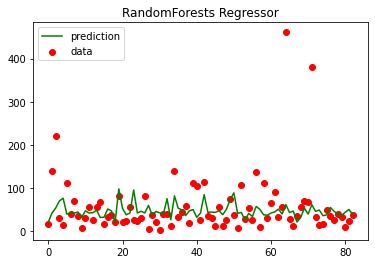

In [24]:
model_sj_w1 = RandomForest(X_train_sj_w1, X_test_sj_w1,y_train_sj_w1,y_test_sj_w1,1000,4)


Now with the second set:

Error Measure  9.8315 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


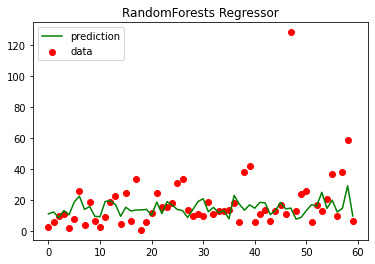

In [25]:
model_sj_w2 = RandomForest(X_train_sj_w2, X_test_sj_w2,y_train_sj_w2,y_test_sj_w2,500,5)

We run the algorithm with the data from Iquitos:

Error Measure  6.628397435897436 



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


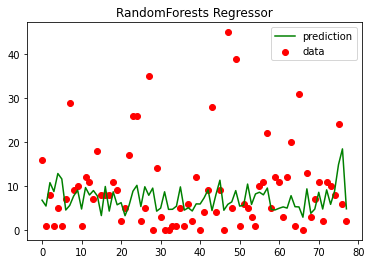

In [28]:
model_iq = RandomForest(X_train_iq,X_test_iq,y_train_iq,y_test_iq,500,4)

#** Submission result**

Now, we are going to test our model with the data provided to us in the dengue_features_test.csv file to predict dengue cases for the weeks proposed in said file.

As we have three models, we have to predict three times, so the test dataset must be splitted in three, depending on the city and the weeks


Cases from San Juan:

In [29]:
sj_test = test[test['city']=='sj']
sj_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.00150,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,-0.00150,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,sj,2013,13,2013-03-26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,298.885714,294.675714,301.3,296.4,2.55,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5
256,sj,2013,14,2013-04-02,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,298.157143,294.628571,301.5,295.9,64.30,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6
257,sj,2013,15,2013-04-09,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,299.328571,294.948571,301.5,297.5,0.70,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4
258,sj,2013,16,2013-04-16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,299.064286,294.678571,300.9,297.3,1.40,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9


Cases from San Juan on the first set of weeks:

In [30]:
sj_test_week1 = sj_test[sj_test['weekofyear']<=3]
sj_test_week1 = sj_test_week1.append(sj_test[sj_test['weekofyear']>=30])
sj_test_week1

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
35,sj,2009,1,2009-01-01,0.500400,0.161425,0.160786,0.188650,0.00,297.788571,297.914286,292.737143,299.9,294.9,17.50,73.778571,0.00,14.285714,2.600000,25.071429,6.028571,28.9,20.6,11.7
36,sj,2009,2,2009-01-08,-0.081400,0.008100,0.353240,0.252400,0.00,297.751429,297.950000,292.747143,300.3,294.3,3.45,73.954286,0.00,14.285714,2.871429,25.071429,6.200000,28.9,20.6,3.6
37,sj,2009,3,2009-01-15,0.076400,0.010200,0.171933,0.119771,0.00,298.291429,298.535714,294.052857,299.8,297.2,6.50,77.522857,0.00,15.421429,1.985714,25.928571,6.028571,29.4,22.2,8.5
88,sj,2010,1,2010-01-08,0.332000,0.041200,0.202383,0.189700,0.00,298.660000,298.828571,294.777143,301.7,296.6,17.76,79.324286,0.00,16.151429,2.914286,26.457143,6.585714,31.7,21.7,0.3
89,sj,2010,2,2010-01-15,0.022700,0.022700,0.176771,0.158214,6.24,298.452857,298.664286,294.400000,301.6,296.5,16.97,78.645714,6.24,15.784286,3.042857,25.614286,7.071429,31.7,20.6,48.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,sj,2012,47,2012-11-25,0.104600,0.002300,0.006200,-0.014671,27.82,300.225714,300.228571,296.538571,302.0,298.9,12.00,80.302857,27.82,17.940000,2.171429,27.914286,5.885714,31.1,24.4,14.2
239,sj,2012,48,2012-12-02,-0.168767,-0.032167,0.212986,0.187929,26.60,299.762857,300.014286,295.638571,302.0,298.0,21.70,78.221429,26.60,16.981429,2.457143,27.614286,5.742857,31.1,23.9,46.6
240,sj,2012,49,2012-12-09,-0.168767,0.016300,0.190243,0.159857,3.08,299.331429,299.271429,295.247143,301.4,297.5,16.20,78.307143,3.08,16.560000,2.228571,27.142857,5.885714,31.1,23.3,58.9
241,sj,2012,50,2012-12-16,-0.364000,-0.142900,0.067257,0.065857,34.66,299.150000,299.200000,294.357143,300.9,297.1,19.30,75.081429,34.66,15.682857,2.200000,27.085714,6.300000,32.2,22.8,9.8


Cases from San Juan on the second set of weeks:

In [31]:
sj_test_week2 = sj_test.drop(sj_test_week1.index)
sj_test_week2

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.00150,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,-0.00150,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,sj,2013,13,2013-03-26,-0.08740,-0.016183,0.156343,0.105186,30.34,298.670000,298.885714,294.675714,301.3,296.4,2.55,78.780000,30.34,15.985714,3.314286,27.542857,7.942857,33.9,22.8,3.5
256,sj,2013,14,2013-04-02,-0.20325,-0.077833,0.204171,0.178914,6.55,298.035714,298.157143,294.628571,301.5,295.9,64.30,81.650000,6.55,15.881429,2.828571,26.642857,6.642857,33.3,22.8,17.6
257,sj,2013,15,2013-04-09,-0.11760,-0.008200,0.192700,0.170429,0.00,299.057143,299.328571,294.948571,301.5,297.5,0.70,78.285714,0.00,16.212857,3.171429,27.914286,8.114286,32.8,23.3,9.4
258,sj,2013,16,2013-04-16,0.08275,0.031200,0.135014,0.074857,0.00,298.912857,299.064286,294.678571,300.9,297.3,1.40,77.674286,0.00,15.965714,3.042857,27.728571,6.942857,31.7,23.9,22.9


Cases from Iquitos:

In [32]:
iq_test = test[test['city']=='iq']
iq_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400,9.050,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520,10.720,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200,10.075,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700,8.480,32.2,21.8,34.1



We predict with the cases from San Juan's first set of weeks:

In [33]:
final_model_prediction_sj_week1 = model_sj_w1.predict(sj_test_week1[selected_features])

We predict with the cases from San Juan's second set of weeks:

In [34]:
final_model_prediction_sj_week2 = model_sj_w2.predict(sj_test_week2[selected_features])

And now with the cases from Iquitos:

In [35]:
final_model_prediction_iq = model_iq.predict(iq_test[selected_features])


We put together both results in order to obtain the final result:

In [36]:
sj_test_week1['total_cases'] = final_model_prediction_sj_week1
sj_test_week2['total_cases'] = final_model_prediction_sj_week2
iq_test['total_cases'] = final_model_prediction_iq

In [37]:
frames = [sj_test_week1,sj_test_week2,iq_test]
final_prediction = pd.concat(frames)
final_prediction.sort_index()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,12.855
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,15.110
2,sj,2008,20,2008-05-13,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,13.686
3,sj,2008,21,2008-05-20,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,16.876
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,4.563
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,4.384
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,4.926
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,4.028


Finally we try to visualize how our prediction has turned out with reality.

In [38]:
# round the result and cast to int
y = np.rint(final_prediction['total_cases']) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([ 21,  21,  38,  51,  33,  27,  29,  24,  25,  41,  20,  24,  46,
        43,  30,  43,  39,  48,  49,  44,  47,  96,  57,  48,  42,  52,
        40,  38,  52,  56,  41,  53,  50,  53,  21,  30,  54,  21,  49,
        48,  54,  44,  47,  52,  48,  46,  48,  41,  52,  51,  52,  46,
        52,  87,  51,  40,  42,  54,  54,  54,  50,  50,  72,  46, 130,
        84, 130,  99, 132, 124,  46,  45,  44, 109,  43,  54,  36,  41,
        54,  43,  30,  40,  42,  20,  25, 139,  45, 116,  50, 123,  54,
        45,  49,  42,  47,  48,  41,  38,  64,  43,  37,  37,  49,  66,
        36,  39,  31,  39,  48,  44,  48,  78,  52,  42,  45,  61,  60,
        50,  44,  39,  61,  44,  49,  39,  39,  42,  65,  51,  48,  38,
        13,  15,  14,  17,   9,  16,   8,  13,  14,  15,  10,  18,  16,
        14,  17,  17,  17,  19,  20,  16,  17,  17,  17,  20,  12,  14,
        12,  14,  12,  13,  14,  10,  10,  15,  15,  20,  16,  20,  21,
        22,  13,  12,  11,   9,  32,  19,  14,  10,  14,  15,  1

We build the output file


In [39]:
submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])


submission.total_cases = res.astype(np.int64)
submission.to_csv("result.csv")

**And the result is:**

30.1731
Woo! I scored 30.1731 on 'DengAI: Predicting Disease Spread'!